1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

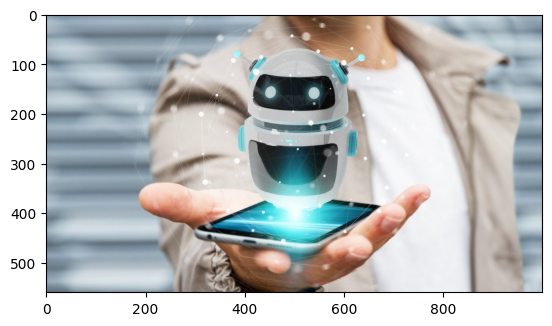

In [9]:
image = Image.open("image.png")
image.save("compressed_image.jpg", "JPEG", optimize=True, quality=85)

compressed_image = Image.open("compressed_image.jpg")
plt.imshow(compressed_image)

2. Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.

In [10]:
import gzip

with open('файл.txt', 'rb') as f_in:
    with gzip.open('файл.txt.gz', 'wb') as f_out:
        f_out.writelines(f_in)

f_in.close()
f_out.close()


3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

In [21]:
import heapq
from heapq import heappop, heappush

def isLeaf(root):
    return root.left is None and root.right is None

 # вузол дерева
class Node:
    def __init__(self, ch, freq, left=None, right=None):
        self.ch = ch
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

def encode(root, s, huffman_code):

    if root is None:
        return

    if isLeaf(root):
        huffman_code[root.ch] = s if len(s) > 0 else '1'

    encode(root.left, s + '0', huffman_code)
    encode(root.right, s + '1', huffman_code)

def decode(root, index, s):

    if root is None:
        return index

    if isLeaf(root):
        print(root.ch, end='')
        return index

    index = index + 1
    root = root.left if s[index] == '0' else root.right
    return decode(root, index, s)

def buildHuffmanTree(text):

    if len(text) == 0:
        return

    freq = {i: text.count(i) for i in set(text)}

    pq = [Node(k, v) for k, v in freq.items()]
    heapq.heapify(pq)

    while len(pq) != 1:

        left = heappop(pq)
        right = heappop(pq)

        total = left.freq + right.freq
        heappush(pq, Node(None, total, left, right))

    root = pq[0]

    huffmanCode = {}
    encode(root, '', huffmanCode)

    print('Huffman Codes are:', huffmanCode)
    print('The original string is:', text)

    s = ''
    for c in text:
        s += huffmanCode.get(c)

    print('The encoded string is:', s)
    print('The decoded string is:', end=' ')

    if isLeaf(root):
        while root.freq > 0:
            print(root.ch, end='')
            root.freq = root.freq - 1
    else:
        index = -1
        while index < len(s) - 1:
            index = decode(root, index, s)

if __name__ == '__main__':

    text = 'Цей Закон визначає правові та організаційні засади створення, функціонування та розвитку національної інфраструктури геопросторових даних, спрямованої на забезпечення ефективного прийняття органами державної влади та органами місцевого самоврядування управлінських рішень, задоволення потреб суспільства в усіх видах географічної інформації, інтегрування у глобальну та європейську інфраструктури геопросторових даних.'
    buildHuffmanTree(text)

Huffman Codes are: {'к': '00000', 'ц': '000010', 'ї': '000011', 'я': '00010', 'п': '00011', 'н': '001', ' ': '010', 'в': '0110', 'г': '01110', 'ф': '011110', 'ь': '011111', 'м': '100000', 'ч': '1000010', 'б': '1000011', 'з': '100010', 'х': '100011', 'р': '1001', 'Ц': '10100000', 'є': '10100001', 'ш': '101000100', 'З': '101000101', 'ж': '101000110', '.': '101000111', 'л': '101001', 'у': '10101', 'с': '10110', 'й': '1011100', ',': '1011101', 'д': '101111', 'и': '11000', 'е': '11001', 'о': '1101', 'і': '11100', 'т': '11101', 'а': '1111'}
The original string is: Цей Закон визначає правові та організаційні засади створення, функціонування та розвитку національної інфраструктури геопросторових даних, спрямованої на забезпечення ефективного прийняття органами державної влади та органами місцевого самоврядування управлінських рішень, задоволення потреб суспільства в усіх видах географічної інформації, інтегрування у глобальну та європейську інфраструктури геопросторових даних.
The encoded stri